In [6]:
##### 화자인식 일반 머신러닝 코드 #####
import librosa
import librosa.display
import pyaudio #마이크를 사용하기 위한 라이브러리
import wave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression#텐서플로우로 바꿀예정
import os
##### 변수 설정 부분 #####
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100 #비트레이트 설정
CHUNK = int(RATE / 10) # 버퍼 사이즈 1초당 44100비트레이트 이므로 100ms단위
RECORD_SECONDS = 1 #녹음할 시간 설정
WAVE_OUTPUT_FILENAME = "output.wav"
DATA_PATH = "./sound_data/"
train_data=[]#train_date 저장할 공강
train_label=[]#train_label 저장할 
test_data=[]#train_date 저장할 공강
test_label=[]#train_label 저장할 
##########################

def load_wave_generator(path): 
       
    batch_waves = []
    labels = []
    # input_width=CHUNK*6 # wow, big!!
    folders = os.listdir(path)
    #while True:
       # print("loaded batch of %d files" % len(files))
    for folder in folders:
        if not os.path.isdir(path):continue #폴더가 아니면 continue                   
        files = os.listdir(path+"/"+folder)        
        print("Foldername :",folder,"-",len(files))#폴더 이름과 그 폴더에 속하는 파일 갯수 출력
        for wav in files:
            if not wav.endswith(".wav"):continue
            else:
                global train_data,train_label#전역변수를 사용하겠다.
                print("Filename :",wav)#.wav 파일이 아니면 continue
                y, sr = librosa.load(path+"/"+folder+"/"+wav)
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T
                if(len(train_data)==0):
                    train_data = mfcc
                    train_label = np.full(len(mfcc), int(folder))
                else:
                    train_data = np.concatenate((train_data, mfcc), axis = 0)
                    train_label = np.concatenate((train_label, np.full(len(mfcc),  int(folder))), axis = 0)
                    #print("mfcc :",mfcc.shape)
                
load_wave_generator(DATA_PATH)

Foldername : .ipynb_checkpoints - 0
Foldername : 0 - 20
Filename : 1.wav
Filename : 10.wav
Filename : 11.wav
Filename : 12.wav
Filename : 13.wav
Filename : 14.wav
Filename : 15.wav
Filename : 16.wav
Filename : 17.wav
Filename : 18.wav
Filename : 19.wav
Filename : 2.wav
Filename : 20.wav
Filename : 3.wav
Filename : 4.wav
Filename : 5.wav
Filename : 6.wav
Filename : 7.wav
Filename : 8.wav
Filename : 9.wav
Foldername : 1 - 20
Filename : Ryu1.wav
Filename : Ryu10.wav
Filename : Ryu11.wav
Filename : Ryu12.wav
Filename : Ryu13.wav
Filename : Ryu14.wav
Filename : Ryu15.wav
Filename : Ryu16.wav
Filename : Ryu17.wav
Filename : Ryu18.wav
Filename : Ryu19.wav
Filename : Ryu2.wav
Filename : Ryu20.wav
Filename : Ryu3.wav
Filename : Ryu4.wav
Filename : Ryu5.wav
Filename : Ryu6.wav
Filename : Ryu7.wav
Filename : Ryu8.wav
Filename : Ryu9.wav
Foldername : 2 - 20
Filename : 경재원1.wav
Filename : 경재원10.wav
Filename : 경재원11.wav
Filename : 경재원12.wav
Filename : 경재원13.wav
Filename : 경재원14.wav
Filename : 경재원15.

In [7]:
print(train_data.shape)
print(train_label.shape)
train_label


(49326, 13)
(49326,)


array([0, 0, 0, ..., 2, 2, 2])

In [8]:
# Shuffle
tmp = [[x,y] for x, y in zip(train_data, train_label)]
tmp

[[array([-809.5012,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
            0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
            0.    ], dtype=float32),
  0],
 [array([-809.5012,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
            0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
            0.    ], dtype=float32),
  0],
 [array([-809.5012,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
            0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
            0.    ], dtype=float32),
  0],
 [array([-809.5012,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
            0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
            0.    ], dtype=float32),
  0],
 [array([-809.5012,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
            0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
            0.    ], dtype=float32),
  0],
 [array([-809.5012,    0.    ,    0

In [9]:
import random

random.shuffle(tmp)
tmp

[[array([-3.5494925e+02,  1.5801495e+02, -3.1269336e-01,  5.9105404e+01,
          2.7100003e+00,  9.4271955e+00, -8.5722103e+00, -4.9047153e+01,
          8.1600828e+00, -9.1390762e+00, -3.5448044e+01,  1.7447746e+01,
         -1.9867140e+01], dtype=float32),
  2],
 [array([-311.6675    ,  185.92908   ,    8.634925  ,   33.793472  ,
           -0.67234504,    5.7337394 ,   15.388208  ,  -29.864952  ,
           -6.0704575 ,    7.273401  ,   -2.4572413 ,   -9.082369  ,
          -15.955403  ], dtype=float32),
  1],
 [array([-4.9517621e+02,  1.7999979e+02,  4.8008945e+01,  5.4930126e+01,
          9.1672230e+00,  2.3712177e+01,  1.5927782e+01, -2.0929209e+01,
         -7.8654280e+00, -5.7353067e+00,  1.6210370e-02,  1.3957440e+01,
         -2.3718777e+01], dtype=float32),
  2],
 [array([-647.6222   ,   95.95582  ,   48.16398  ,   22.43044  ,
            0.8316202,   28.556232 ,   20.135633 ,    6.8338633,
           -9.048334 ,  -18.479269 ,    1.896994 ,   -7.5102396,
            1.476

In [10]:
train_data_ran = [n[0] for n in tmp]
train_label_ran = [n[1] for n in tmp]

In [ ]:
######## 음성 데이터를 녹음 해 저장하는 부분 ########

p = pyaudio.PyAudio() # 오디오 객체 생성

stream = p.open(format=FORMAT, # 16비트 포맷
                channels=CHANNELS, #  모노로 마이크 열기
                rate=RATE, #비트레이트
                input=True,
                frames_per_buffer=CHUNK) # CHUNK만큼 버퍼가 쌓인다.

print("Start to record the audio.")

frames = [] # 음성 데이터를 채우는 공간

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)): 
    #지정한  100ms를 몇번 호출할 것인지 10 * 5 = 50  100ms 버퍼 50번채움 = 5초
    data = stream.read(CHUNK)
    frames.append(data)

print("Recording is finished.")

stream.stop_stream() # 스트림닫기
stream.close() # 스트림 종료
p.terminate() # 오디오객체 종료

# WAVE_OUTPUT_FILENAME의 파일을 열고 데이터를 쓴다.
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb') 
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

spf = wave.open(WAVE_OUTPUT_FILENAME,'r')

signal = spf.readframes(-1)
signal = np.fromstring(signal, dtype=np.int16)

#시간 흐름에 따른 그래프를 그리기 위한 부분
Time = np.linspace(0,len(signal)/RATE, num=len(signal)) 

plt.figure(1)
plt.title('Voice Signal Wave...')
#plt.plot(signal) // 음성 데이터의 그래프
plt.plot(Time, signal)
plt.show()

train_data.shape : (50200, 13) <class 'numpy.ndarray'>
train_label.shape : (50200,) <class 'numpy.ndarray'>


C:\Users\ChangJun.Choi\Anaconda3\envs\tf_gpu2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 3 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 1 3 3 3 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 4 0 0 0 0 0 0 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 4 0 4 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1 2 0 1 4 0 0 0 0 4
 4 4 4 4 4 4 4 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 1 1
 1 4 0 0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 4 1 0 0 0 0 0 0 0 0 0 0 0 2 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 1 1 1 1 0 

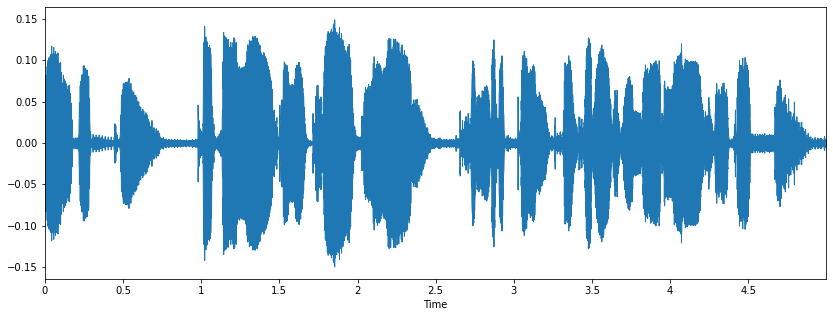

In [9]:
######## 음성 데이터를 읽어와 학습 시키는 부분 ########

print("train_data.shape :", train_data.shape, type(train_data))
print("train_label.shape :", train_label.shape, type(train_label))
#print(mfcc[0])
#print(train_label)
clf = LogisticRegression()
clf.fit(train_data,train_label)

y, sr = librosa.load("./test_유인나1.wav")
#y, sr = librosa.load("./baecheolsu15.wav")
plt.figure(figsize=(14,5))
librosa.display.waveplot(y, sr)
#y, sr = librosa.load(WAVE_OUTPUT_FILENAME)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T

y_test_estimated = clf.predict(mfcc)
print(y_test_estimated)
test_label = np.full(len(mfcc), 0)
print(test_label)
'''
0 유인나
1 배철수
2 이재은
3 최일구
4 문재인 대통령
'''
# 정답률 구하기 
ac_score = metrics.accuracy_score(y_test_estimated, test_label)
print("정답률 =", ac_score)
print(pd.value_counts(pd.Series(y_test_estimated)))

In [11]:
train_data.shape

(49326, 13)

In [12]:
train_data_in = train_data_ran[:45000]
test_data_in = train_data_ran[45000:]
train_label_in = train_label_ran[:45000]
test_label_in = train_label_ran[45000:]

In [13]:
train_data_in = np.array(train_data_in)
test_data_in = np.array(test_data_in)
train_label_in = np.array(train_label_in)
test_label_in = np.array(test_label_in)

In [14]:
len(np.unique(train_label_in))

3

In [15]:
import keras
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
# 3. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=13, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
history = model.fit(train_data_in, train_label_in, epochs=50, batch_size=64,
                   validation_data = (test_data_in, test_label_in)
                   )

# 6. 모델 평가하기
# scores = model.evaluate(test_data_in, test_label_in)
# print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

Using TensorFlow backend.


Train on 45000 samples, validate on 4326 samples
Epoch 1/50
45000/45000 [==============================] - 4s 86us/step - loss: 0.6666 - accuracy: 0.7333 - val_loss: 0.5473 - val_accuracy: 0.7709
Epoch 2/50
45000/45000 [==============================] - 3s 75us/step - loss: 0.4851 - accuracy: 0.8013 - val_loss: 0.5003 - val_accuracy: 0.7931
Epoch 3/50
45000/45000 [==============================] - 3s 77us/step - loss: 0.4400 - accuracy: 0.8185 - val_loss: 0.4435 - val_accuracy: 0.8128
Epoch 4/50
45000/45000 [==============================] - 4s 80us/step - loss: 0.4147 - accuracy: 0.8296 - val_loss: 0.4297 - val_accuracy: 0.8225
Epoch 5/50
45000/45000 [==============================] - 3s 74us/step - loss: 0.3981 - accuracy: 0.8353 - val_loss: 0.4096 - val_accuracy: 0.8343
Epoch 6/50
45000/45000 [==============================] - 3s 76us/step - loss: 0.3831 - accuracy: 0.8418 - val_loss: 0.4148 - val_accuracy: 0.8227
Epoch 7/50
45000/45000 [==============================] - 3s 74us/ste

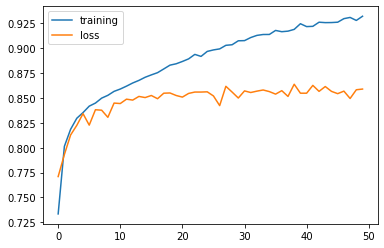

In [17]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['training', 'loss'], loc = 'upper left')
plt.show()

In [117]:
history_dict = history.history
print(history_dict.keys())
print(scores)


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
[0.9533084793274219, 0.6555769443511963]


In [101]:
test_label_in[245:255]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])